
Random Forest Results:
Accuracy: 0.8361
Cross-validation mean accuracy: 0.8058 (+/- 0.0200)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



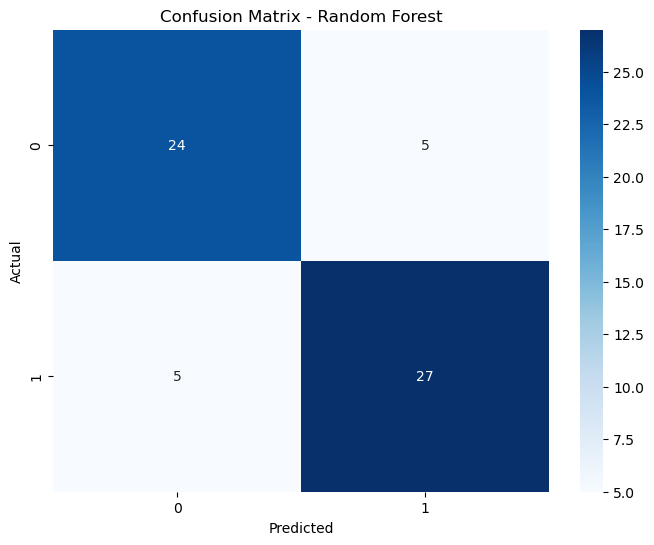


Logistic Regression Results:
Accuracy: 0.8525
Cross-validation mean accuracy: 0.8180 (+/- 0.0997)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



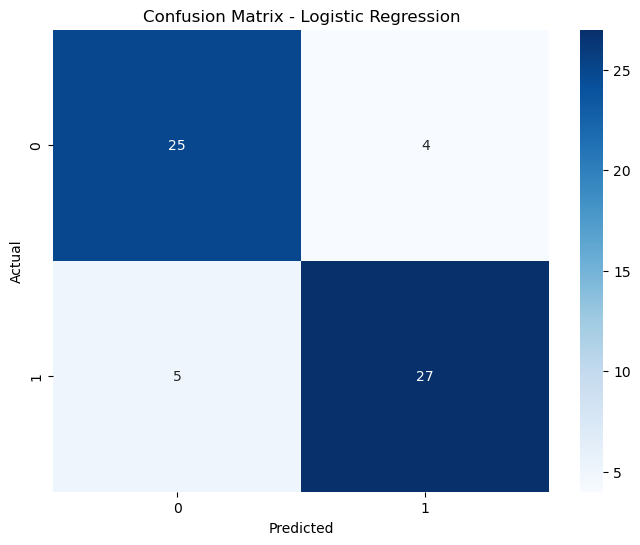


SVM Results:
Accuracy: 0.8689
Cross-validation mean accuracy: 0.8224 (+/- 0.0539)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



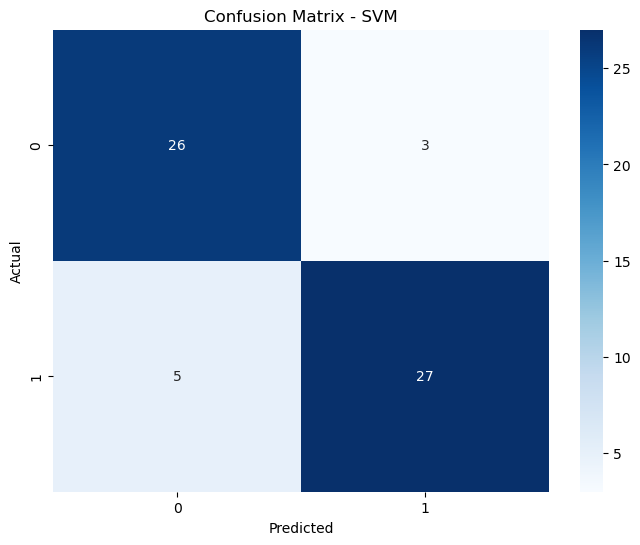


KNN Results:
Accuracy: 0.9016
Cross-validation mean accuracy: 0.8141 (+/- 0.0684)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



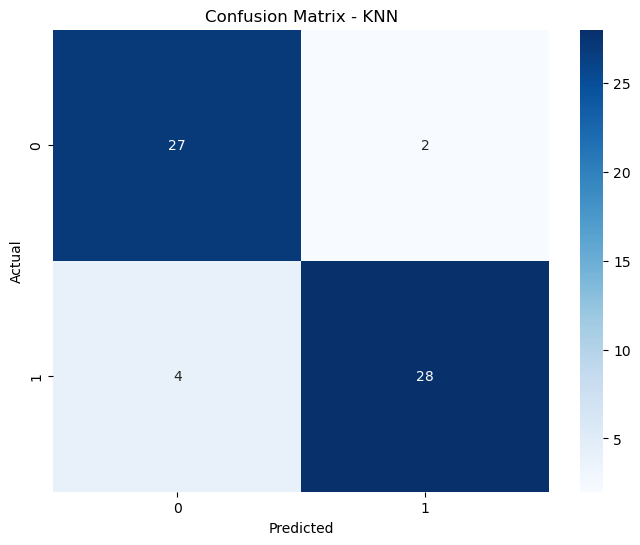

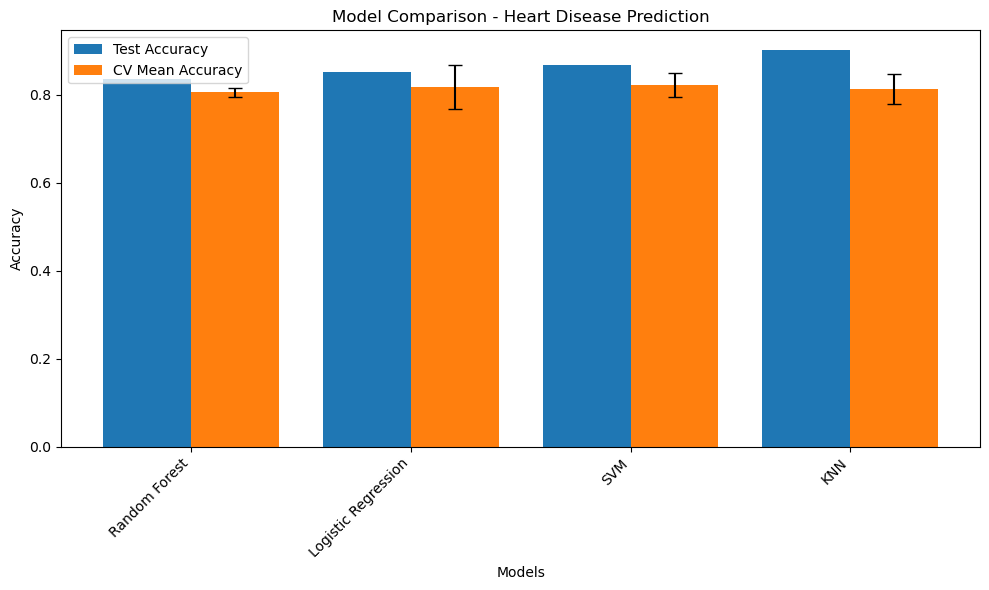


Final Comparison:
Random Forest:
  Test Accuracy: 0.8361
  CV Mean Accuracy: 0.8058 (+/- 0.0200)

Logistic Regression:
  Test Accuracy: 0.8525
  CV Mean Accuracy: 0.8180 (+/- 0.0997)

SVM:
  Test Accuracy: 0.8689
  CV Mean Accuracy: 0.8224 (+/- 0.0539)

KNN:
  Test Accuracy: 0.9016
  CV Mean Accuracy: 0.8141 (+/- 0.0684)



In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart.csv')

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': np.mean(cv_scores),
        'cv_std': np.std(cv_scores)
    }
    
    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation mean accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare model performances
accuracies = [result['accuracy'] for result in results.values()]
cv_means = [result['cv_mean'] for result in results.values()]
cv_stds = [result['cv_std'] for result in results.values()]

plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar(x, accuracies, width=0.4, label='Test Accuracy', align='center')
plt.bar([i + 0.4 for i in x], cv_means, width=0.4, label='CV Mean Accuracy', align='center')
plt.errorbar([i + 0.4 for i in x], cv_means, yerr=cv_stds, fmt='none', capsize=5, color='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Heart Disease Prediction')
plt.xticks([i + 0.2 for i in x], list(models.keys()), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Print final comparison
print("\nFinal Comparison:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Test Accuracy: {result['accuracy']:.4f}")
    print(f"  CV Mean Accuracy: {result['cv_mean']:.4f} (+/- {result['cv_std'] * 2:.4f})")
    print()